# Libraries

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
pio.templates.default='plotly_white'

# data set

In [4]:
df = pd.read_csv("netflix_content_2023.csv")
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


# Cleaning and Analysis

In [45]:
df['Hours Viewed']=df['Hours Viewed'].str.replace(',','').astype('float')

In [47]:
df[['Title','Hours Viewed']]

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0
...,...,...
24807,We Are Black and British: Season 1,100000.0
24808,Whitney Cummings: Can I Touch It?,100000.0
24809,Whitney Cummings: Jokes,100000.0
24810,"Whose Vote Counts, Explained: Limited Series",100000.0


In [50]:
content_type_viewership=df.groupby('Content Type')['Hours Viewed'].sum()

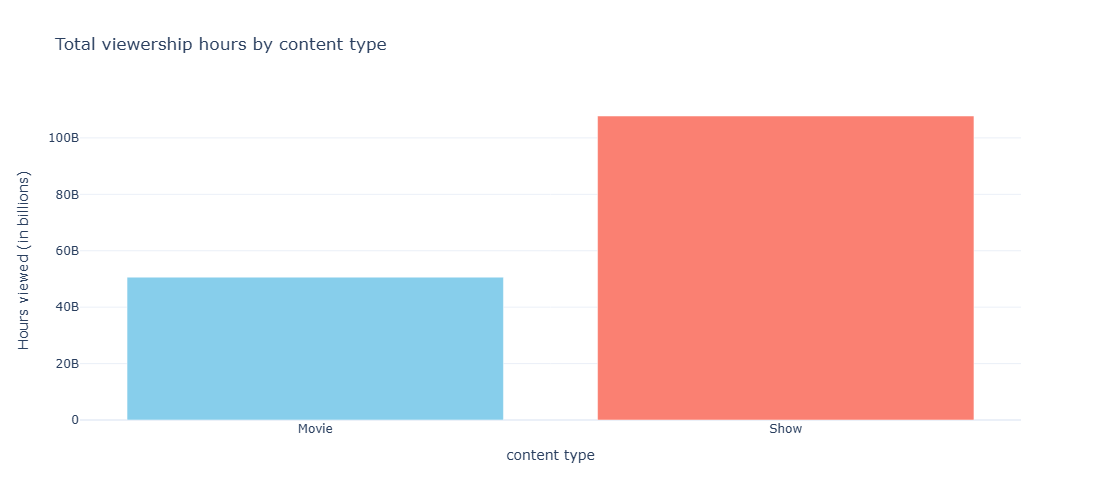

In [100]:
fig=go.Figure(data=[
    go.Bar(
        x=content_type_viewership.index,
        y=content_type_viewership.values,
        marker_color=['skyblue','salmon']
    )
])

fig.update_layout(
    title='Total viewership hours by content type ',
    xaxis_title='content type',
    yaxis_title='Hours viewed (in billions)',
    xaxis_tickangle=0,
    height=500,
    width=800
)
fig.show()

In [119]:
Language_veiwership=df.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)

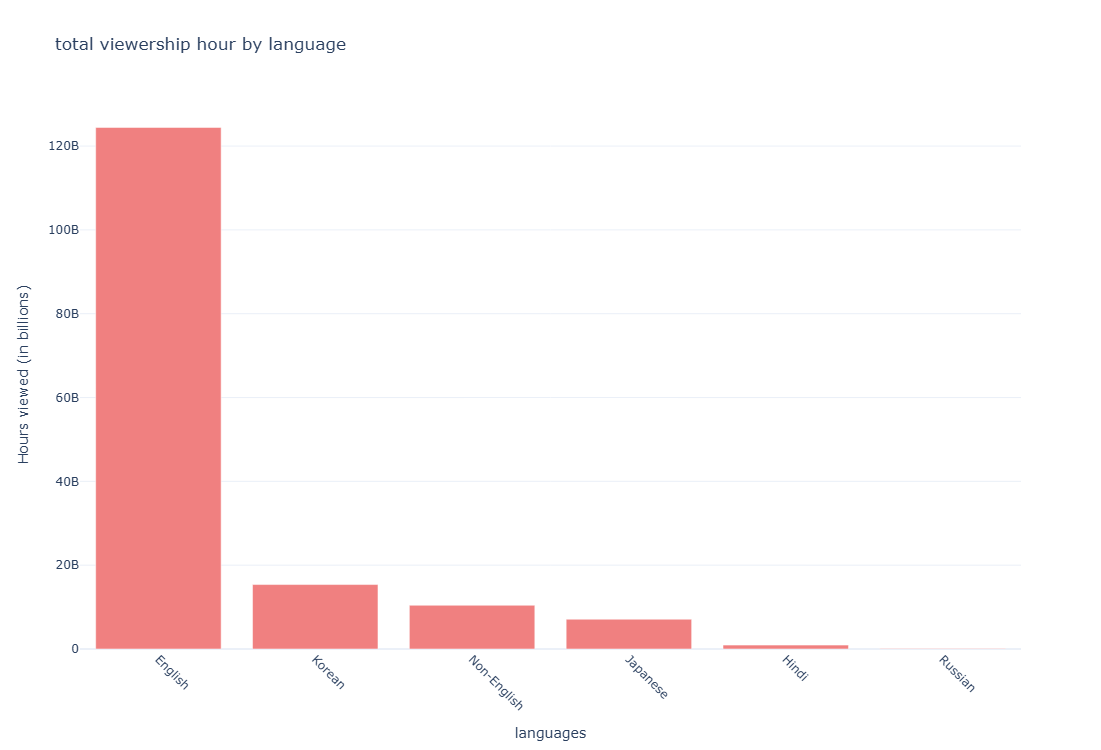

In [121]:
fig=go.Figure(data=[
              go.Bar(
                  x=Language_veiwership.index,
                  y=Language_veiwership.values,
                  marker_color='lightcoral'
              )
])

fig.update_layout(
    title='total viewership hour by language',
    xaxis_title='languages',
    yaxis_title='Hours viewed (in billions)',
    xaxis_tickangle=45,
    height=750,
    width=600
)
fig.show()

In [127]:
df['Release Date']=pd.to_datetime(df['Release Date'])
df['Release Month']=df['Release Date'].dt.month

In [129]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,11.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,5.0


In [131]:
monthly_viewership=df.groupby('Release Month')['Hours Viewed'].sum()
monthly_viewership

Release Month
1.0     7.271600e+09
2.0     7.103700e+09
3.0     7.437100e+09
4.0     6.865700e+09
5.0     7.094600e+09
6.0     8.522000e+09
7.0     6.524800e+09
8.0     6.817800e+09
9.0     7.262200e+09
10.0    8.123200e+09
11.0    7.749500e+09
12.0    1.005580e+10
Name: Hours Viewed, dtype: float64

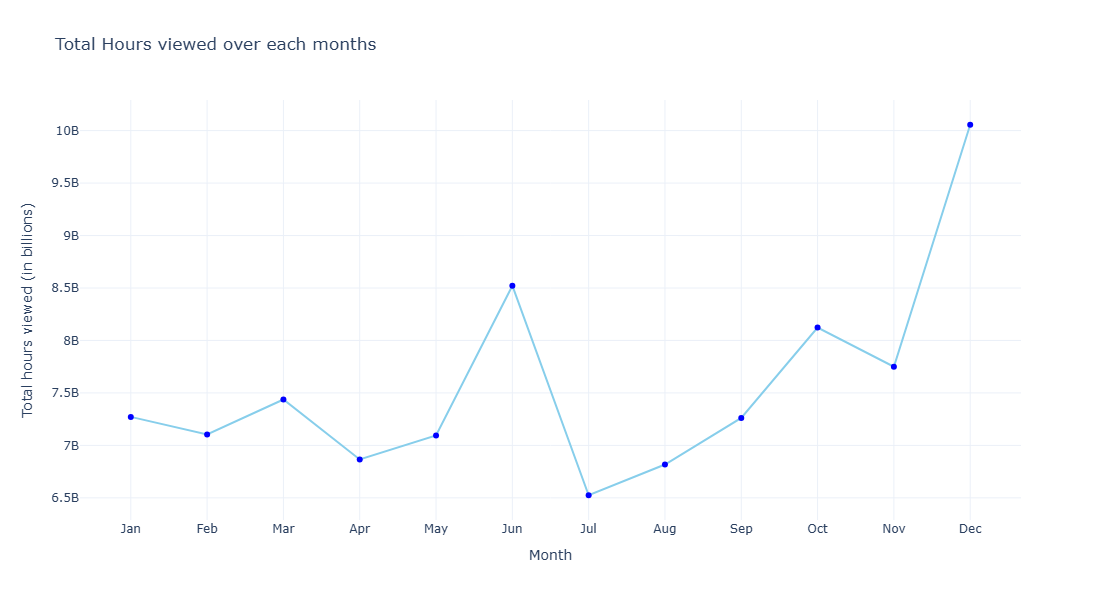

In [143]:
fig=go.Figure(data=[
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        mode='lines+markers',
        marker=dict(color='blue'),
        line=dict(color='skyblue')
    )
])

fig.update_layout(
    title='Total Hours viewed over each months',
    xaxis_title='Month',
    yaxis_title='Total hours viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1,13)),
        ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ),
    height=600,
    width=1000
)

fig.show()

In [145]:
top_5_titles=df.nlargest(5,'Hours Viewed')

In [151]:
top_5_titles[['Title','Release Date','Hours Viewed','Content Type','Language Indicator',]]

,Title,Release Date,Hours Viewed,Content Type,Language Indicator
0,The Night Agent: Season 1,2023-03-23,812100000.0,Show,English
1,Ginny & Georgia: Season 2,2023-01-05,665100000.0,Show,English
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,2023-06-17,630200000.0,Movie,Korean
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0,Show,Korean
18214,ONE PIECE: Season 1,2023-08-31,541900000.0,Show,English


In [155]:
monthly_viewership_by_type=df.pivot_table(
                                            index='Release Month',
                                            columns='Content Type',
                                            values = 'Hours Viewed',
                                            aggfunc='sum'
                                        )

In [176]:
monthly_viewership_by_type

Content Type,Movie,Show
Release Month,,
1.0,2.275900e+09,4.995700e+09
2.0,1.654400e+09,5.449300e+09
3.0,2.109400e+09,5.327700e+09
4.0,2.757600e+09,4.108100e+09
5.0,2.520500e+09,4.574100e+09
6.0,3.135800e+09,5.386200e+09
7.0,1.615700e+09,4.909100e+09
8.0,2.186400e+09,4.631400e+09
9.0,2.092300e+09,5.169900e+09


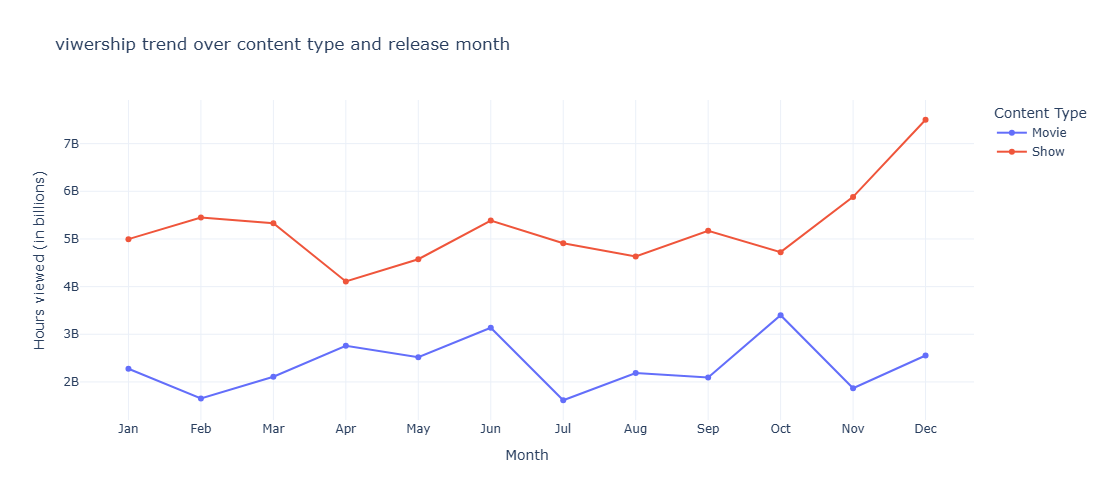

In [172]:
fig=go.Figure()
for content_type in monthly_viewership_by_type.columns:
    fig.add_trace(
        go.Scatter(
            x=monthly_viewership_by_type.index,
            y=monthly_viewership_by_type[content_type],
            mode='lines+markers',
            name=content_type
        )
    )
fig.update_layout(
    title='viwership trend over content type and release month',
    xaxis_title='Month',
    yaxis_title='Hours viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1,13)),
        ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
        
    ),
    height=500,
    width=800,
    legend_title='Content Type'
)

fig.show()

In [182]:
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'

In [184]:
df['Release Season']=df['Release Month'].apply(get_season)

In [186]:
df['Release Season']

0        Spring
1        Winter
2        Winter
3          Fall
4        Spring
          ...  
24807      Fall
24808    Summer
24809    Summer
24810      Fall
24811      Fall
Name: Release Season, Length: 24812, dtype: object

In [210]:
seasonal_viewership=df.groupby('Release Season')['Hours Viewed'].sum()

In [212]:
seasonal_viewership

Release Season
Fall      9.070880e+10
Spring    2.139740e+10
Summer    2.186460e+10
Winter    2.443110e+10
Name: Hours Viewed, dtype: float64

In [214]:
season_order = ['Winter','Spring','Summer','Fall']
seasonal_viewership=seasonal_viewership.reindex(season_order)
seasonal_viewership

Release Season
Winter    2.443110e+10
Spring    2.139740e+10
Summer    2.186460e+10
Fall      9.070880e+10
Name: Hours Viewed, dtype: float64

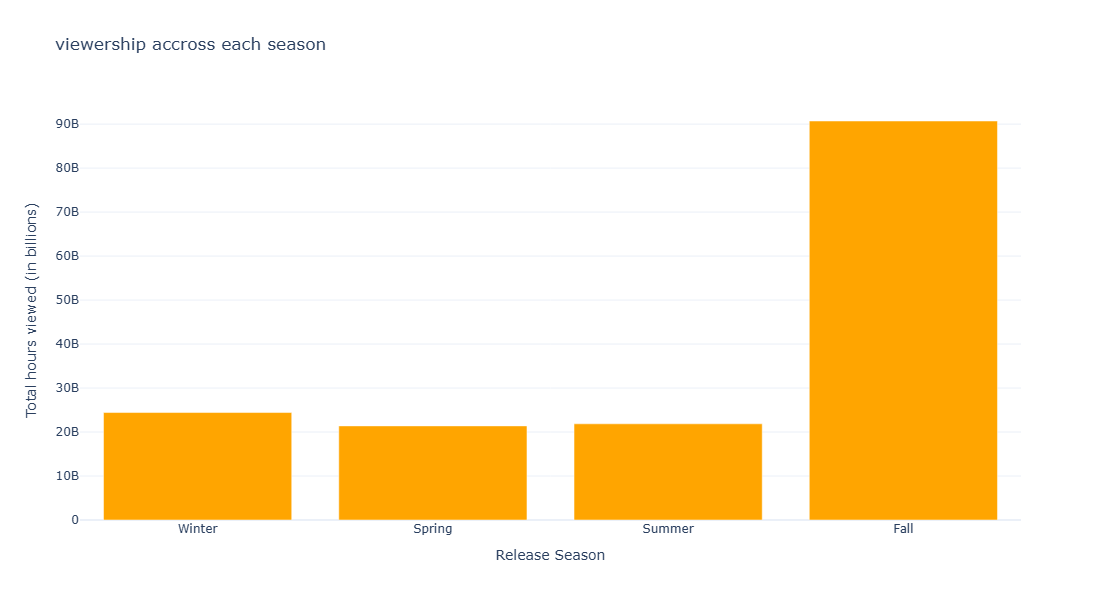

In [216]:
fig = go.Figure(data=[
    go.Bar(
        x=seasonal_viewership.index,
        y=seasonal_viewership.values,
        marker_color='orange'
    )
])

fig.update_layout(
    title='viewership accross each season',
    xaxis_title='Release Season',
    yaxis_title='Total hours viewed (in billions)',
    height=600,
    width=400
)
fig.show()

In [228]:
monthly_releases=df['Release Month'].value_counts().sort_index()

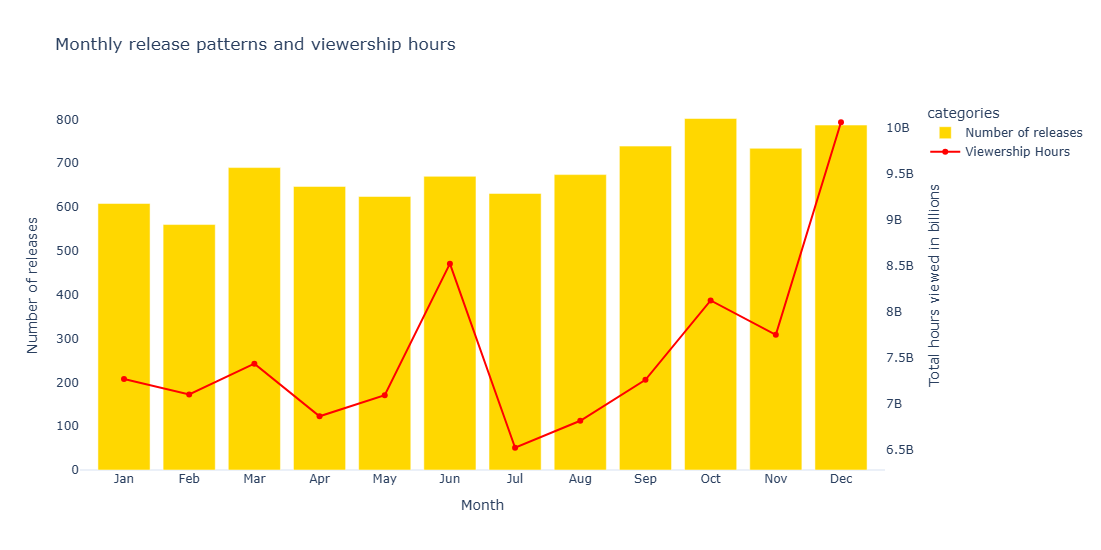

In [276]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=monthly_releases.index,
        y=monthly_releases.values,
        name = 'Number of releases',
        marker_color='gold',
        yaxis='y1'
    )
)
fig.add_trace(
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
        
    )
)

fig.update_layout(
    title='Monthly release patterns and viewership hours',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1,13)),
        ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ),
    yaxis=dict(
        title='Number of releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total hours viewed in billions',
        side='right',
        overlaying='y',
        showgrid=False
    ),
    legend=dict(
        x=1.05,
        y=1,
        orientation='v',
        xanchor='left'         
    ),
    legend_title='categories',
    height=550,
    width=1000
)

fig.show()

From this graph number of releases is relativly steady till the end of the year , and th viewership has a shrap increase in jun and in significantly peak in december despite of the number releases this indicates that viewership is solely not dependent on the number of releases but but influanced by time and sopecific contant during these months

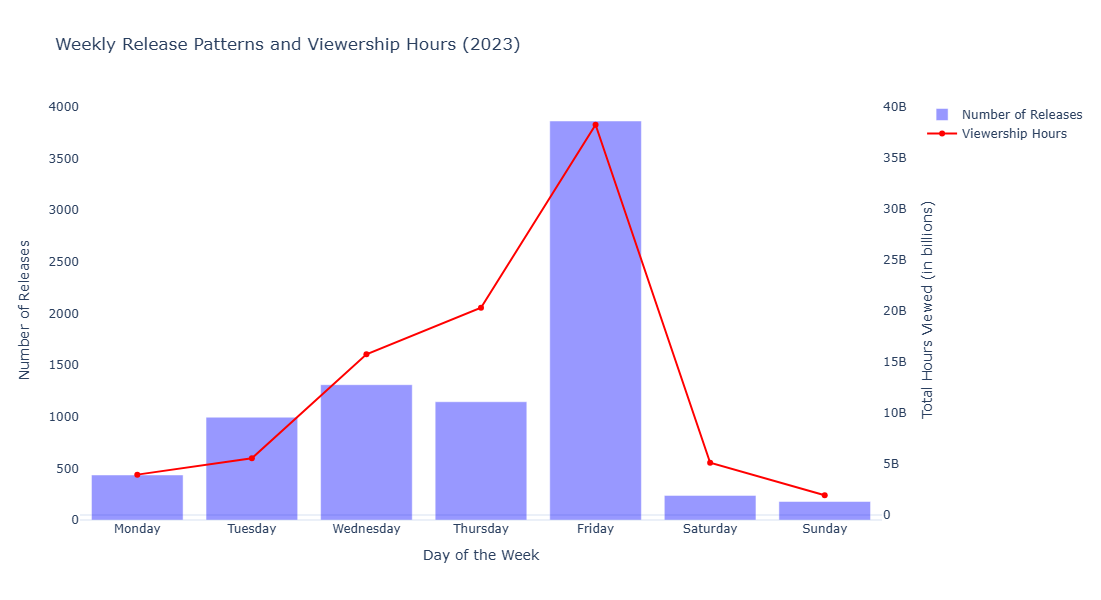

In [302]:
df['Release Day'] = df['Release Date'].dt.day_name()

weekday_releases = df['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_viewership = df.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=weekday_releases.index,
        y=weekday_releases.values,
        name='Number of Releases',
        marker_color='blue',
        opacity=0.4,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=weekday_viewership.index,
        y=weekday_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Weekly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Day of the Week',
        tickmode='array',
        categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,  
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

fig.show()

In [286]:
important_dates = [
    '2023-01-01',  
    '2023-02-14', 
    '2023-07-04',  
    '2023-10-31',  
    '2023-12-25'   
]
important_dates = pd.to_datetime(important_dates)

holiday_releases = df[df['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0


## summary